In [1]:
# !pip install statsmodels matplotlib pandas scikit-learn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### a. Perform Simple Linear Regression

In [2]:
# Read the data from the CSV file.
df = pd.read_csv("owid-covid-data.csv")

# drop rows with missing values
df.dropna(subset=['total_cases', 'stringency_index', 'gdp_per_capita'], inplace=True)

In [3]:
# Define the predictors and response.
X = df[['stringency_index', 'gdp_per_capita']]
y = df['total_cases']

# Add a constant to the model (intercept).
X = sm.add_constant(X)

# Fit the model.
model = sm.OLS(y, X).fit()

# Print the regression summary.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2473.
Date:                Sat, 21 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:41:58   Log-Likelihood:            -3.1330e+06
No. Observations:              184582   AIC:                         6.266e+06
Df Residuals:                  184579   BIC:                         6.266e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.55e+06   2.92e+04  

#### Regression Output and Comments
- **Statistical Significance** : Both predictors (`stringency_index` and `gdp_per_capita`) are statistically significant, as indicated by their p-values < 0.05.
- **Coefficients** :
 `stringency_index`: Negative coefficient suggests that stricter measures are associated with fewer cases.
`gdp_per_capita`: Positive coefficient indicates a higher number of cases in wealthier regions.
- **R-squared** : Very low (0.026), indicating the model explains only 2.6% of the variance in `total_cases`. This suggests a weak model fit.
- **Durbin-Watson** : Low value implies potential autocorrelation.
- **Condition Number** : High, suggesting potential multicollinearity or numerical issues.

### b. Is there a relationship between the predictors and the response?
- Based on the p-values of the coefficients, both stringency index and GDP per capita are statistically significant predictors of total cases. The p-value for stringency index is 0.000, and the p-value for GDP per capita is also 0.000. Since these p-values are less than the significance level of 0.05, we can conclude that there is a relationship between the predictors and the response.

### c. How strong is the relationship between the predictor and the response?
- The relationship is weak, as indicated by the low R-squared value of 0.026, meaning only 2.6% of the variance in `total_cases` is explained by the model.

### d. Is the relationship between the predictor and the response positive or negative?
- **Stringency Index** : Negative relationship (higher stringency, fewer cases).
- **GDP per Capita** : Positive relationship (higher GDP, more cases).
- the sign of the coefficient determines the direction of the relationship. The negative coefficient for stringency index indicates a negative relationship, meaning that as the stringency index increases, the total cases decrease. The positive coefficient for GDP per capita indicates a positive relationship, meaning that as the GDP per capita increases, the total cases also increase.

### e.What is the predicted “total_cases” associated with the value given in the value column? 
- To predict the total cases associated with a specific value of the predictors, you can use the regression equation.
- formula :
total_cases_pred = 1.55 X 10^6 - 2.001 X 10^4 X stringency + 39.4284 X gdp_per_capita

For example, if the stringency index is 50 and the GDP per capita is $40,000, you can calculate the predicted total cases as follows:
 
predicted_total_cases = 1.55*10^06 - (2.001e+04 * 50) + (39.4284 * 40000) = 2126636.0

### f. Plot two charts with the response and each of the predictors.


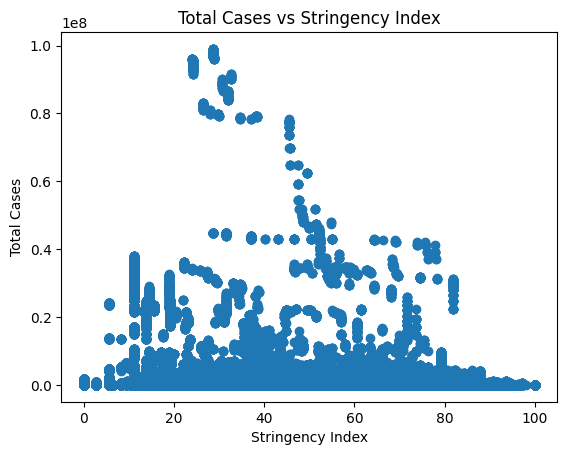

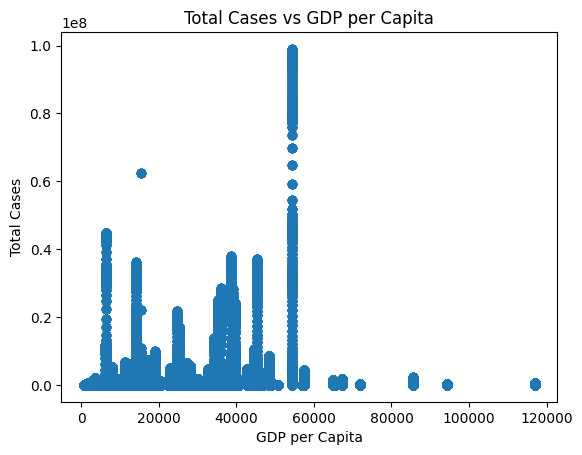

In [4]:
# Plot Total Cases vs Stringency Index
plt.scatter(df['stringency_index'], df['total_cases'])
plt.xlabel('Stringency Index')
plt.ylabel('Total Cases')
plt.title('Total Cases vs Stringency Index')
plt.show()

# Plot Total Cases vs GDP per Capita
plt.scatter(df['gdp_per_capita'], df['total_cases'])
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.title('Total Cases vs GDP per Capita')
plt.show()

### g. Do you think your variable is a good predictor?
- No, the weak R-squared value suggests that these predictors do not effectively explain the variation in total cases.

## 2. Discriminant Analysis

In [5]:
# Assume df is your DataFrame with necessary columns filtered and non-null.
df = pd.read_csv("owid-covid-data.csv")

df.dropna(subset=['total_cases', 'stringency_index'], inplace=True)

# Bin total cases into categories (e.g., Low, Medium, High).
df['total_cases_category'] = pd.qcut(df['total_cases'], q=3, labels=['Low', 'Medium', 'High'])

# Prepare the features and target
X = df[['stringency_index']]
y = df['total_cases_category']

# Encode target categories
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply LDA
lda = LDA()
lda.fit(X, y_encoded)

# Predict categories
df['predicted_category'] = le.inverse_transform(lda.predict(X))

print(df[['stringency_index', 'total_cases_category', 'predicted_category']].head())

   stringency_index total_cases_category predicted_category
0               0.0                  Low               High
1               0.0                  Low               High
2               0.0                  Low               High
3               0.0                  Low               High
4               0.0                  Low               High


## 3. Create Your Own Question and Provide the Answer
### Q: What is the average stringency index for countries categorized as having 'High' total cases?


In [6]:
# Filter data for 'High' total cases category
high_cases = df[df['total_cases_category'] == 'High']

# Calculate average stringency index
average_stringency = high_cases['stringency_index'].mean()
print(f"The average stringency index for countries with 'High' total cases is: {average_stringency:.2f}")

The average stringency index for countries with 'High' total cases is: 39.68
